In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv("C://Users//SUYDUBEY//Documents//Data Science//Sample datasets//titanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

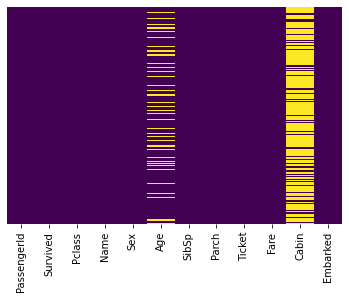

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

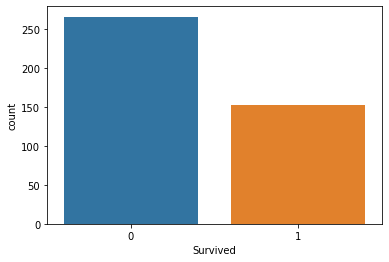

In [6]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

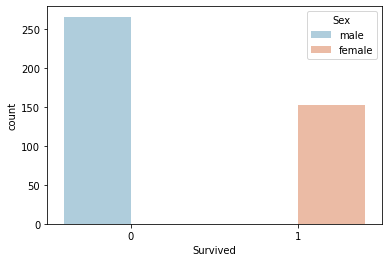

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

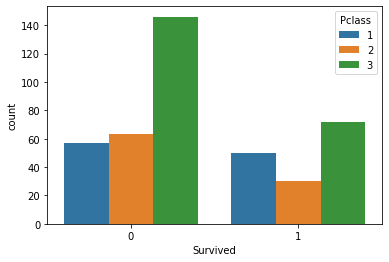

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\SUYDUBEY\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

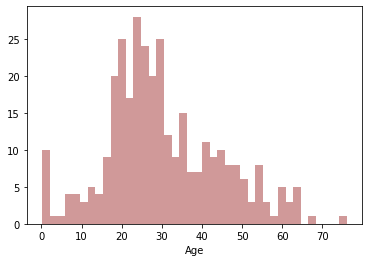

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

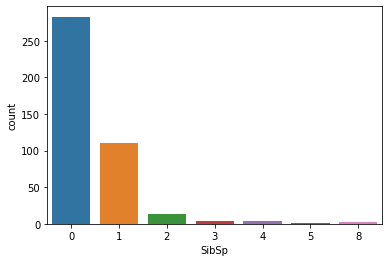

In [11]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

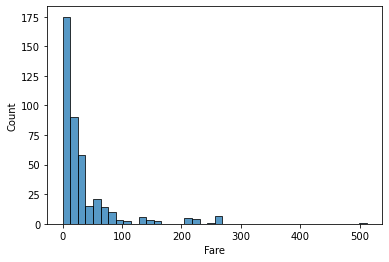

In [13]:
sns.histplot(x='Fare',bins=40,data=train)

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

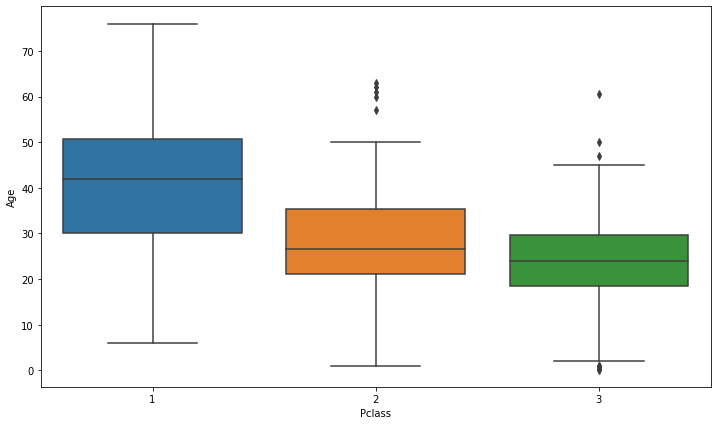

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [15]:
 def impute_age(cols):
        Age = cols[0]
        Pclass = cols[1]
        
        if pd.isnull(Age):
            if Pclass == 1:
                return 37
            
            elif Pclass == 2:
                return 29
            
            else:
                return 24
            
        else:
            return Age

In [16]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


# Converting Categorical Features

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [23]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [26]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,892,0,3,34.5,0,0,7.8292
1,893,1,3,47.0,1,0,7.0000
2,894,0,2,62.0,0,0,9.6875
3,895,0,3,27.0,0,0,8.6625
4,896,1,3,22.0,1,1,12.2875


In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,1,1,0
1,893,1,3,47.0,1,0,7.0000,0,0,1
2,894,0,2,62.0,0,0,9.6875,1,1,0
3,895,0,3,27.0,0,0,8.6625,1,0,1
4,896,1,3,22.0,1,1,12.2875,0,0,1


# Building Logistic Regression

In [31]:
train.drop(['Survived'],axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [32]:
train['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split

# Training and Predicting

In [35]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').